In [1]:
# Initialization
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')

## Exercise 1
### Regression
#### Build a regression model to estimate the weight based on height

In [2]:
from pandas import read_csv, get_dummies
from sklearn.model_selection import train_test_split as split
from sklearn.linear_model import LinearRegression

df = read_csv('data/genders_heights_weights.csv')
X1 = df.values[:, 1].reshape(-1, 1)
y1 = df.values[:, 2]
X1_train, X1_test, y1_train, y1_test = split(X1, y1, random_state=42)

To do: 
- Build a linear regression model (name it as lnr1) to estimate weight using height
- Evaluate the model's performance with R2 score

In [3]:
lnr1 = LinearRegression().fit(X1_train, y1_train)
print(f'lnr1 R2 score: {lnr1.score(X1_test, y1_test)}')

lnr1 R2 score: 0.8573115456970967


In [4]:
h = eval(input('Enter height: '))
print(f'Estimated weight is: {lnr1.predict([[h]])}kg')

Enter height: 175
Estimated weight is: [82.03843622]kg


To do: Build another linear regression model to estimate the weight based on height and gender

In [5]:
y2 = df.values[:, 2]
del df['Weight']
df = get_dummies(df, drop_first=True)
print(df.head())

X2 = df.values
X2_train, X2_test, y2_train, y2_test = split(X2, y2, random_state=42)

lnr2 = LinearRegression().fit(X2_train, y2_train)
print(f'lnr2 R2 score: {lnr2.score(X2_test, y2_test)}')

   Height  Gender_Male
0   187.6            1
1   174.7            1
2   188.2            1
3   182.2            1
4   177.5            1
lnr2 R2 score: 0.9026663813060709


In [6]:
h = eval(input('Enter height: '))
g = eval(input('Enter gender: '))
print(f'Estimated weight is: {lnr2.predict([[h, g]])}kg')

Enter height: 175
Enter gender: 0
Estimated weight is: [75.670656]kg


## Exercise 2 
### Classification
#### Compare 7 classification models for handwritten digit recognition

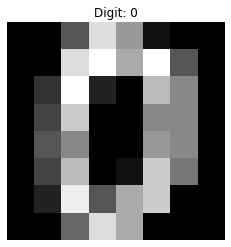

In [7]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split as split, KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA

X, y = load_digits(return_X_y=True)

# View one of the image
plt.imshow(X[0, :].reshape(8, 8), cmap='gray')
plt.axis(False)
plt.title(f'Digit: {y[0]}')
plt.show()

To do: 
- Check the number of features in the dataset

In [8]:
print(f'Number of features: {X.shape[1]}')

Number of features: 64


To do:
- Use spot-checking technique to compare 7 classification models

In [9]:
models = []
models.append(('knn', KNeighborsClassifier()))
models.append(('lgr', LogisticRegression()))
models.append(('mnb', MultinomialNB()))
models.append(('svc', SVC()))
models.append(('dtc', DecisionTreeClassifier()))
models.append(('rfc', RandomForestClassifier()))
models.append(('gbc', GradientBoostingClassifier()))

kf = KFold(n_splits=5, shuffle=True, random_state=42)
for n, m in models:
    scores = cross_val_score(m, X, y, cv=kf, n_jobs=-1)
    print(f'{n} mean: {scores.mean()}, standard deviation: {scores.std()}')

knn mean: 0.9860832559579078, standard deviation: 0.008266317105066581
lgr mean: 0.9621556793562365, standard deviation: 0.0041929656728311926
mnb mean: 0.9009470752089136, standard deviation: 0.011476490055835021
svc mean: 0.987757660167131, standard deviation: 0.0013602978323628584
dtc mean: 0.8575425564840607, standard deviation: 0.016328876438541636
rfc mean: 0.9755122253172391, standard deviation: 0.006692267429390771
gbc mean: 0.9665985762921696, standard deviation: 0.016254444362021326


To do: 
- Use Univariate Selection to select 20 best features. Evaluate the performance of the best model above on these features using 5-fold cross validation.

In [10]:
fs = SelectKBest(k=20)
X_small1 = fs.fit_transform(X, y)

scores1 = cross_val_score(KNeighborsClassifier(), X_small1, y, cv=kf, n_jobs=-1)
print(f'knn mean: {scores1.mean()}, standard deviation: {scores1.std()}')

knn mean: 0.9577065923862582, standard deviation: 0.006451859746513139


To do: 
- Use Principle Component Analysis (PCA) to reduce the dimensionality of the original features to 10. Evaluate the performance of k-Nearest Neighbors, Logistic Regression and Decision Tree on these features using 5-fold cross validation.

In [11]:
dr = PCA(n_components=10)
X_small2 = dr.fit_transform(X)

models = []
models.append(('knn', KNeighborsClassifier()))
models.append(('lgr', LogisticRegression()))
models.append(('dtc', DecisionTreeClassifier()))

for n, m in models:
    scores = cross_val_score(m, X_small2, y, cv=kf, n_jobs=-1)
    print(f'{n} mean: {scores.mean()}, standard deviation: {scores.std()}')

knn mean: 0.9749535747446612, standard deviation: 0.008460151329954192
lgr mean: 0.9271030640668524, standard deviation: 0.012102685444699921
dtc mean: 0.8686768802228413, standard deviation: 0.01178429956592472


## Exercise 3
### Clustering
#### Construct a model to group the truck drivers

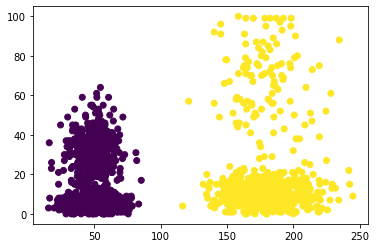

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Read dataset
df = pd.read_csv('data/drivers.csv', sep='\t')

# Store features (Column 1 & 2)
X = df.iloc[:, 1:].values

# Apply k-mean clustering with 2 clusters
km = KMeans(n_clusters=2).fit(X)

plt.scatter(X[:, 0], X[:, 1], c=km.labels_)
plt.show()

To do: To group the truck drivers into 4 clusters and label the data samples according to their cluster

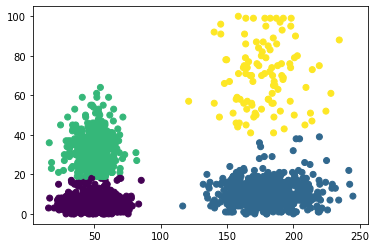

In [13]:
# Apply k-mean clustering with 2 clusters
km2 = KMeans(n_clusters=4).fit(X)

plt.scatter(X[:, 0], X[:, 1], c=km2.labels_)
plt.show()

To do: Add labels to df and save it as a CSV file called 'drivers_labelled.csv'

In [14]:
df['Label'] = km2.labels_
df.to_csv('data/drivers_labelled.csv', index=False)